In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import kstest, shapiro

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Original Data

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Colab Tugas Akhir/Churn_Modelling.csv')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.groupby('Exited').aggregate({'Exited':['count']})

,Exited
,count
Exited,
0,7963
1,2037


In [12]:
df.duplicated().sum()

0

In [13]:
df.duplicated(subset=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']).sum()

0

# Pre-Split Processing (Label Encoding & One Hot Encoding)

Sebelum dilakukan split dataset menjadi data training dan data testing, serta testing pada model Machine Learning, perlu dilakukan Encoding terhadap data Kategorikal. Hal ini dilakukan agar data tersebut berubah menjadi numerikal dan dapat di-preprocessing secara lanjut pada pre-processing selanjutnya (Outlier Handling, Feature Transformation, Class Imbalance).

**Label Encoding:** Kolom Gender

In [14]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

df['Gender'] = df['Gender'].map(mapping_gender)

In [15]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0


Label Encoding terhadap kolom Gender telah berhasil dilakukan.

**One Hot Encoding:** Kolom Geography

In [16]:
for cat in ['Geography']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [17]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


Label Encoding terhadap kolom Gender telah berhasil dilakukan.

# **Feature Selection Sebelum Preprocessing (Chi-Squared)**

# **Split Train & Test data**

Setelah dilakukan Encoding, tahap selanjutnya adalah split dataset menjadi data training dan testing.

In [18]:
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']]
y = df[['Exited']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Data Preprocessing (Log Transformation, Standardization and Class Imbalance Handling)

Setelah dilakukan Preprocessing berupa Encoding dan split dataset, Data
Training dan Testing masing-masing dilakukan Preprocessing lanjutan. Hal ini dilakukan agar tidak terjadi kebocoran data untuk Machine Learning antara Data Training dan Data Testing.

**Check:** X training

In [19]:
X_train.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9069,619,1,32,4,175406.13,2,1,1,172792.43,0,0,1
2603,643,1,34,7,160426.07,1,0,1,188533.11,0,1,0
7738,561,0,33,6,0.00,2,0,0,173680.39,1,0,0
1579,618,0,41,8,37702.79,1,1,1,195775.48,0,1,0
5058,714,0,37,9,148466.93,2,0,1,151280.96,1,0,0
5753,760,1,41,6,0.00,2,0,0,101491.23,0,0,1
3548,770,0,37,5,141547.26,2,0,1,180326.83,0,1,0
409,537,1,41,3,138306.34,1,1,0,106761.47,0,1,0
4097,597,1,26,7,0.00,2,1,0,110253.20,0,0,1
6461,710,1,36,4,116085.06,1,1,0,58601.61,1,0,0


**Check:** Y training

In [20]:
y_train.head(10)

,Exited
9069,1
2603,0
7738,0
1579,0
5058,0
5753,0
3548,0
409,0
4097,0
6461,0


**Joining** X training and Y training

In [21]:
df_train = X_train.join(y_train)
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
9069,619,1,32,4,175406.13,2,1,1,172792.43,0,0,1,1
2603,643,1,34,7,160426.07,1,0,1,188533.11,0,1,0,0
7738,561,0,33,6,0.00,2,0,0,173680.39,1,0,0,0
1579,618,0,41,8,37702.79,1,1,1,195775.48,0,1,0,0
5058,714,0,37,9,148466.93,2,0,1,151280.96,1,0,0,0


In [22]:
numcols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

Pada Preprocessing dataset Training, dilakukan beberapa tahapan, yaitu Outlier Handling, Feature Transformation, dan Class Imbalance, seperti pada tahap Stage 2 yaitu Data Preprocessing.

**Outlier Handling** using  Z-Score

In [23]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in numcols:
    zscore = abs(stats.zscore(df_train[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df_train = df_train[filtered_entries]

print(f'Jumlah baris sesudah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 7000
Jumlah baris sesudah memfilter outlier: 6903


Outlier handling dari dataset Training telah berhasil.

**Feature Transformation** using Log Transformation (`Age` column only)

<Axes: xlabel='Age', ylabel='Density'>

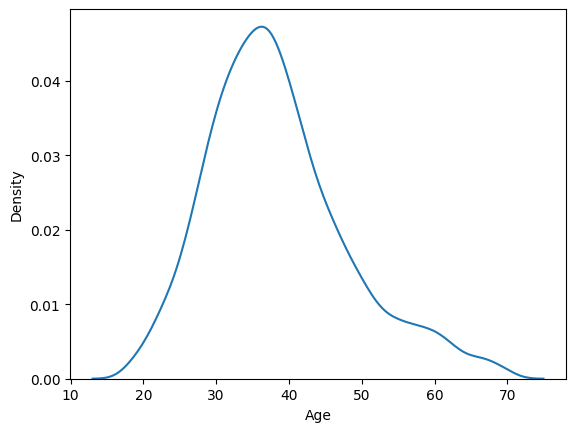

In [24]:
sns.kdeplot(x='Age', data=df_train)

In [25]:
df_train['log_Age'] = np.log(df_train['Age'])

<Axes: xlabel='log_Age', ylabel='Density'>

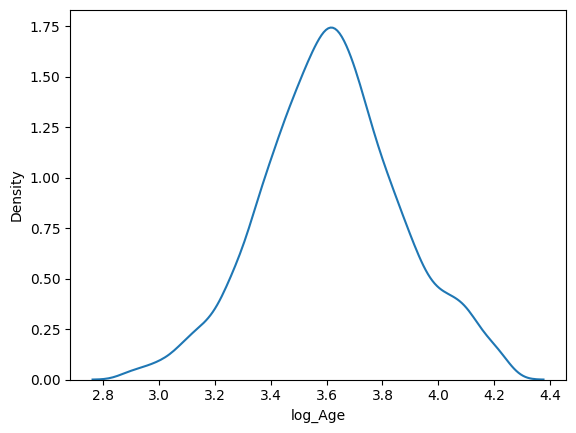

In [26]:
sns.kdeplot(x='log_Age', data=df_train)

Log Transformation pada kolom `Age` telah berhasil dilakukan.

**Feature Transformation** using Standardization (for `CreditScore`, `Balance`, `EstimatedSalary`, `log_Age`)

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_train['CreditScore_std'] = MinMaxScaler().fit_transform(df_train['CreditScore'].values.reshape(len(df_train), 1))
df_train['Balance_std'] = MinMaxScaler().fit_transform(df_train['Balance'].values.reshape(len(df_train), 1))
df_train['EstimatedSalary_std'] = MinMaxScaler().fit_transform(df_train['EstimatedSalary'].values.reshape(len(df_train), 1))
df_train['log_Age_std'] = MinMaxScaler().fit_transform(df_train['log_Age'].values.reshape(len(df_train), 1))

In [28]:
df_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited,log_Age,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std
count,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000
mean,652.187600,0.452122,38.412285,4.987687,76519.063552,1.525279,0.705925,0.509344,100894.829394,0.500652,0.248877,0.250471,0.209184,3.617439,0.592139,0.304981,0.504325,0.535347
std,96.138893,0.497738,9.705013,2.883620,62524.711702,0.581435,0.455659,0.499949,57640.488043,0.500036,0.432394,0.433316,0.406756,0.248623,0.198225,0.249204,0.288374,0.183064
min,365.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000
25%,585.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51939.430000,0.000000,0.000000,0.000000,0.000000,3.465736,0.453608,0.000000,0.259402,0.423646
50%,653.000000,0.000000,37.000000,5.000000,96654.720000,1.000000,1.000000,1.000000,100919.190000,1.000000,0.000000,0.000000,0.000000,3.610918,0.593814,0.385235,0.504447,0.530545
75%,720.000000,1.000000,43.000000,7.000000,127878.415000,2.000000,1.000000,1.000000,150411.940000,1.000000,0.000000,1.000000,0.000000,3.761200,0.731959,0.509683,0.752058,0.641200
max,850.000000,1.000000,70.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,4.248495,1.000000,1.000000,1.000000,1.000000


Feature Transformation berupa normalization telah berhasil dilakukan

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 9069 to 7270
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          6903 non-null   int64  
 1   Gender               6903 non-null   int64  
 2   Age                  6903 non-null   int64  
 3   Tenure               6903 non-null   int64  
 4   Balance              6903 non-null   float64
 5   NumOfProducts        6903 non-null   int64  
 6   HasCrCard            6903 non-null   int64  
 7   IsActiveMember       6903 non-null   int64  
 8   EstimatedSalary      6903 non-null   float64
 9   Geography_France     6903 non-null   uint8  
 10  Geography_Germany    6903 non-null   uint8  
 11  Geography_Spain      6903 non-null   uint8  
 12  Exited               6903 non-null   int64  
 13  log_Age              6903 non-null   float64
 14  CreditScore_std      6903 non-null   float64
 15  Balance_std          6903 non-null 

Dari pengecekan **df.info()**, dapat dipastikan bahwa Preprocessing dataset training telah berhasil. Selanjutnya, dilakukan drop kolom yang sudah ter-outdated.

In [30]:
df_train = df_train.drop(columns=['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'log_Age'])

In [31]:
df_train.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Exited,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std
9069,1,4,2,1,1,0,0,1,1,0.523711,0.699113,0.864027,0.423646
2603,1,7,1,0,1,0,1,0,0,0.573196,0.639407,0.942778,0.468285
7738,0,6,2,0,0,1,0,0,0,0.404124,0.000000,0.868470,0.446304
1579,0,8,1,1,1,0,1,0,0,0.521649,0.150271,0.979011,0.606131
5058,0,9,2,0,1,1,0,0,0,0.719588,0.591742,0.756406,0.530545


In [32]:
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_train_final_non_classimbhandling.csv', index = False)

**Class Imbalance Handling Using SMOTE** for target variable (`Exited`)

Tahapan selanjutnya adalah Class Imbalance Handling menggunakan SMOTE pada variabel target (`Exited`).

In [33]:
Xt = df_train[['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
               'Geography_France', 'Geography_Germany', 'Geography_Spain',
               'CreditScore_std', 'Balance_std', 'EstimatedSalary_std', 'log_Age_std']]
yt = df_train[['Exited']]

from imblearn import under_sampling, over_sampling
Xt_under, yt_under = under_sampling.RandomUnderSampler(sampling_strategy = 0.5).fit_resample(Xt, yt)
Xt_over, yt_over = over_sampling.RandomOverSampler(sampling_strategy = 0.5).fit_resample(Xt, yt)
Xt_over_SMOTE, yt_over_SMOTE = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(Xt, yt)

Pengecekan Keberhasilan Tahap Class Imbalance

In [34]:
print(yt.value_counts())
print(yt_under.value_counts())
print(yt_over.value_counts())
print(yt_over_SMOTE.value_counts())

Exited
0         5459
1         1444
dtype: int64
Exited
0         2888
1         1444
dtype: int64
Exited
0         5459
1         2729
dtype: int64
Exited
0         5459
1         2729
dtype: int64


In [35]:
print(Xt.shape)
print(Xt_under.shape)
print(Xt_over.shape)
print(Xt_over_SMOTE.shape)

(6903, 12)
(4332, 12)
(8188, 12)
(8188, 12)


Handling Class Imbalance telah berhasil dilakukan. Selanjutnya, dilakukan join data variabel independen dan variabel target untuk dijadikan satu file Dataset Training.

In [36]:
XtYt_smote = Xt_over_SMOTE.join(yt_over_SMOTE)
XtYt_smote.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
0,1,4,2,1,1,0,0,1,0.523711,0.699113,0.864027,0.423646,1
1,1,7,1,0,1,0,1,0,0.573196,0.639407,0.942778,0.468285,0
2,0,6,2,0,0,1,0,0,0.404124,0.000000,0.868470,0.446304,0
3,0,8,1,1,1,0,1,0,0.521649,0.150271,0.979011,0.606131,0
4,0,9,2,0,1,1,0,0,0.719588,0.591742,0.756406,0.530545,0


In [37]:
XtYt_smote.to_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_train_final.csv', index = False)

Hasil preprocessing data training yang dilakukan log transformation, standarization dan class imbalance disimpan dalam file **data_train_final.csv**.

In [38]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_train_final.csv')

df_train.head(5)

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
0,1,4,2,1,1,0,0,1,0.523711,0.699113,0.864027,0.423646,1
1,1,7,1,0,1,0,1,0,0.573196,0.639407,0.942778,0.468285,0
2,0,6,2,0,0,1,0,0,0.404124,0.000000,0.868470,0.446304,0
3,0,8,1,1,1,0,1,0,0.521649,0.150271,0.979011,0.606131,0
4,0,9,2,0,1,1,0,0,0.719588,0.591742,0.756406,0.530545,0


# Test Data Preprocessing (Log Transformation and Standardization)

Preprocessing pada Dataset Testing cukup dilakukan Log Transformation dan Standardization saja. Hal ini dilakukan untuk menyamakan skala pada Dataset Training dan Dataset Testing. Handling Outlier dan Handling Class Imbalance tidak dilakukan agar tidak terjadi kebocoran data.

In [39]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
6252,596,0,32,3,96709.07,2,0,0,41788.37,0,1,0
4684,623,0,43,1,0.00,2,1,1,146379.30,1,0,0
1731,601,1,44,4,0.00,2,1,0,58561.31,0,0,1
4742,506,0,59,8,119152.10,2,1,1,170679.74,0,1,0
4521,560,1,27,7,124995.98,1,1,1,114669.79,0,0,1


In [40]:
y_test.head()

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


In [41]:
df_test = X_test.join(y_test)
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
6252,596,0,32,3,96709.07,2,0,0,41788.37,0,1,0,0
4684,623,0,43,1,0.00,2,1,1,146379.30,1,0,0,0
1731,601,1,44,4,0.00,2,1,0,58561.31,0,0,1,0
4742,506,0,59,8,119152.10,2,1,1,170679.74,0,1,0,0
4521,560,1,27,7,124995.98,1,1,1,114669.79,0,0,1,0


**Feature Transformation** using Log Transformation (`Age` column only)

Sama seperti pada Dataset Training, Log Transformation hanya dilakukan pada kolom `Age`.

<Axes: xlabel='Age', ylabel='Density'>

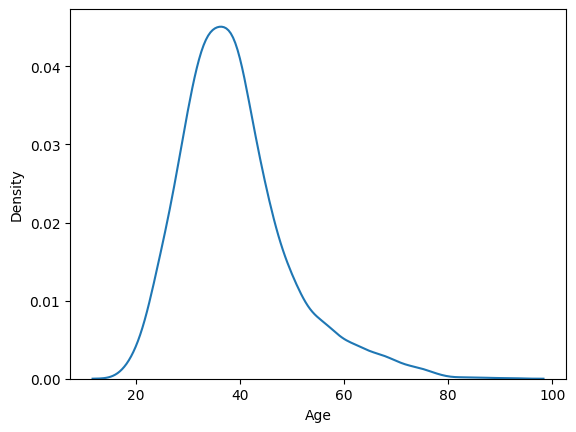

In [42]:
sns.kdeplot(x = 'Age', data = df_test)

In [43]:
df_test['log_Age'] = np.log(df_test['Age'])

<Axes: xlabel='log_Age', ylabel='Density'>

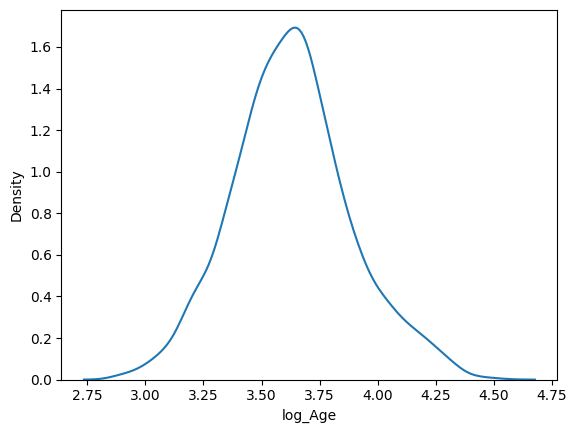

In [44]:
sns.kdeplot(x = 'log_Age', data = df_test)

Log Transformation pada kolom `Age` telah berhasil dilakukan.

**Feature Transformation** using Standarization (for `CreditScore`, `Balance`, `EstimatedSalary`, `log_Age`)

Seperti Preprocessing pada Dataset Training, Standardization juga dilakukan pada kolom yang sama.

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_test['CreditScore_std'] = MinMaxScaler().fit_transform(df_test['CreditScore'].values.reshape(len(df_test), 1))
df_test['Balance_std'] = MinMaxScaler().fit_transform(df_test['Balance'].values.reshape(len(df_test), 1))
df_test['EstimatedSalary_std'] = MinMaxScaler().fit_transform(df_test['EstimatedSalary'].values.reshape(len(df_test), 1))
df_test['log_Age_std'] = MinMaxScaler().fit_transform(df_test['log_Age'].values.reshape(len(df_test), 1))

In [46]:
df_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited,log_Age,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,646.725333,0.456667,38.973333,5.073667,76691.023943,1.54400,0.705333,0.515667,98374.042363,0.502667,0.255667,0.241667,0.194667,3.629544,0.593451,0.354871,0.491859,0.453086
std,97.538391,0.498202,10.445397,2.910967,62119.234456,0.58439,0.455969,0.499838,57133.228670,0.500076,0.436308,0.428165,0.396010,0.255741,0.195077,0.287443,0.285693,0.156760
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000
25%,580.000000,0.000000,32.000000,3.000000,0.000000,1.00000,0.000000,0.000000,49277.915000,0.000000,0.000000,0.000000,0.000000,3.465736,0.460000,0.000000,0.246355,0.352678
50%,649.000000,0.000000,37.500000,5.000000,98430.105000,2.00000,1.000000,1.000000,97712.010000,1.000000,0.000000,0.000000,0.000000,3.624252,0.598000,0.455463,0.488549,0.449842
75%,713.000000,1.000000,44.000000,8.000000,127119.047500,2.00000,1.000000,1.000000,146381.687500,1.000000,1.000000,0.000000,0.000000,3.784190,0.726000,0.588215,0.731920,0.547878
max,850.000000,1.000000,92.000000,10.000000,216109.880000,4.00000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,4.521789,1.000000,1.000000,1.000000,1.000000


Dari pengecekan **df.info()**, dapat dipastikan bahwa Preprocessing Dataset Testing telah berhasil. Selanjutnya, dilakukan drop kolom yang sudah ter-outdated.

**Column Drop and Checking**

In [47]:
df_test = df_test.drop(columns=['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'log_Age'])

In [48]:
df_test.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Exited,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std
6252,0,3,2,0,0,0,1,0,0,0.492,0.447500,0.208904,0.352678
4684,0,1,2,1,1,1,0,0,0,0.546,0.000000,0.731908,0.533787
1731,1,4,2,1,0,0,0,1,0,0.502,0.000000,0.292777,0.547878
4742,0,8,2,1,1,0,1,0,0,0.312,0.551350,0.853422,0.727690
4521,1,7,1,1,1,0,0,1,0,0.420,0.578391,0.573346,0.248536


In [49]:
Xts = df_test[['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
               'Geography_France', 'Geography_Germany', 'Geography_Spain',
               'CreditScore_std', 'Balance_std', 'EstimatedSalary_std', 'log_Age_std']]
yts = df_test[['Exited']]

In [50]:
XtsYts = Xts.join(yts)
XtsYts.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
6252,0,3,2,0,0,0,1,0,0.492,0.447500,0.208904,0.352678,0
4684,0,1,2,1,1,1,0,0,0.546,0.000000,0.731908,0.533787,0
1731,1,4,2,1,0,0,0,1,0.502,0.000000,0.292777,0.547878,0
4742,0,8,2,1,1,0,1,0,0.312,0.551350,0.853422,0.727690,0
4521,1,7,1,1,1,0,0,1,0.420,0.578391,0.573346,0.248536,0


In [51]:
XtsYts.to_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_test_final.csv', index = False)

Hasil preprocessing data testing yang dilakukan log transformation dan standarization disimpan dalam file **cm_test_final.csv**.

# **Feature Selection Sesudah Preprocessing**

## **Chi-Square**

In [52]:
df_chi2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_train_final.csv')
df_chi2.head(5)

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
0,1,4,2,1,1,0,0,1,0.523711,0.699113,0.864027,0.423646,1
1,1,7,1,0,1,0,1,0,0.573196,0.639407,0.942778,0.468285,0
2,0,6,2,0,0,1,0,0,0.404124,0.000000,0.868470,0.446304,0
3,0,8,1,1,1,0,1,0,0.521649,0.150271,0.979011,0.606131,0
4,0,9,2,0,1,1,0,0,0.719588,0.591742,0.756406,0.530545,0


In [53]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df_chi2.drop(columns=['Exited'], axis=1)
y = df_chi2['Exited']

In [54]:
chi_scores = chi2(X,y)

chi_scores

(array([5.38235105e+01, 1.38531438e+01, 1.57986282e+01, 8.55787113e-01,
        1.77035548e+02, 6.66824939e+01, 2.24057349e+02, 2.01305594e+01,
        1.01885665e+00, 3.29221364e+01, 6.34160327e-03, 6.76013568e+01]),
 array([2.19332372e-13, 1.97665775e-04, 7.04535710e-05, 3.54920330e-01,
        2.15134229e-40, 3.18955078e-16, 1.17871348e-50, 7.23316930e-06,
        3.12790367e-01, 9.59247663e-09, 9.36528207e-01, 2.00129795e-16]))

<Axes: >

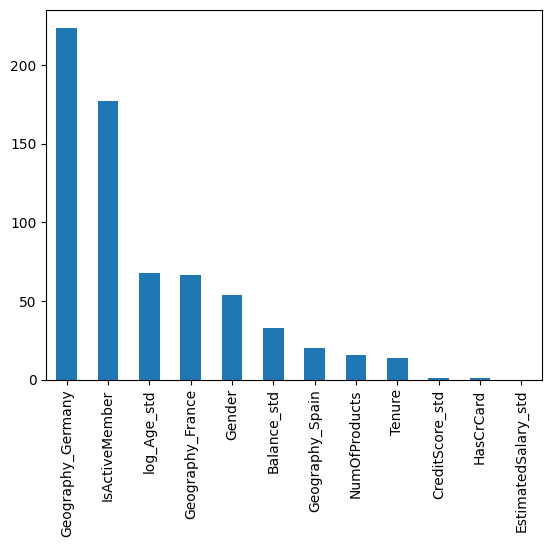

In [55]:
# Chi-squared Scores (Higher chi-squared scores, higher importance)
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

Feature Selected Using Chi-Squared [Geography_germany, IsActiveMember, log_Age_std, Gender]

<Axes: >

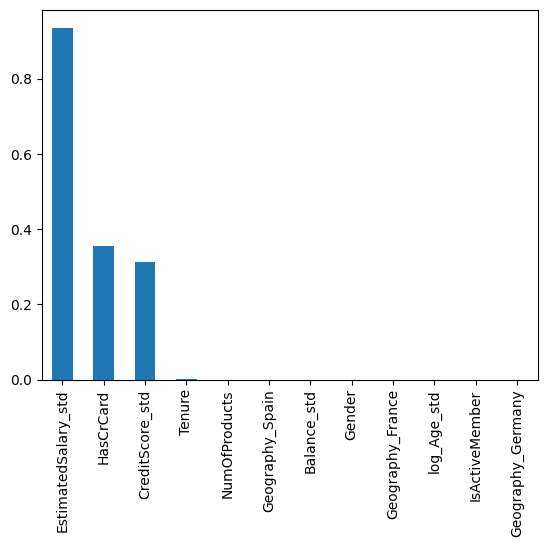

In [56]:
# P-Value Scores (if P-Value > 0.5, lower the importance)
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

## **Pearlson Correlation**

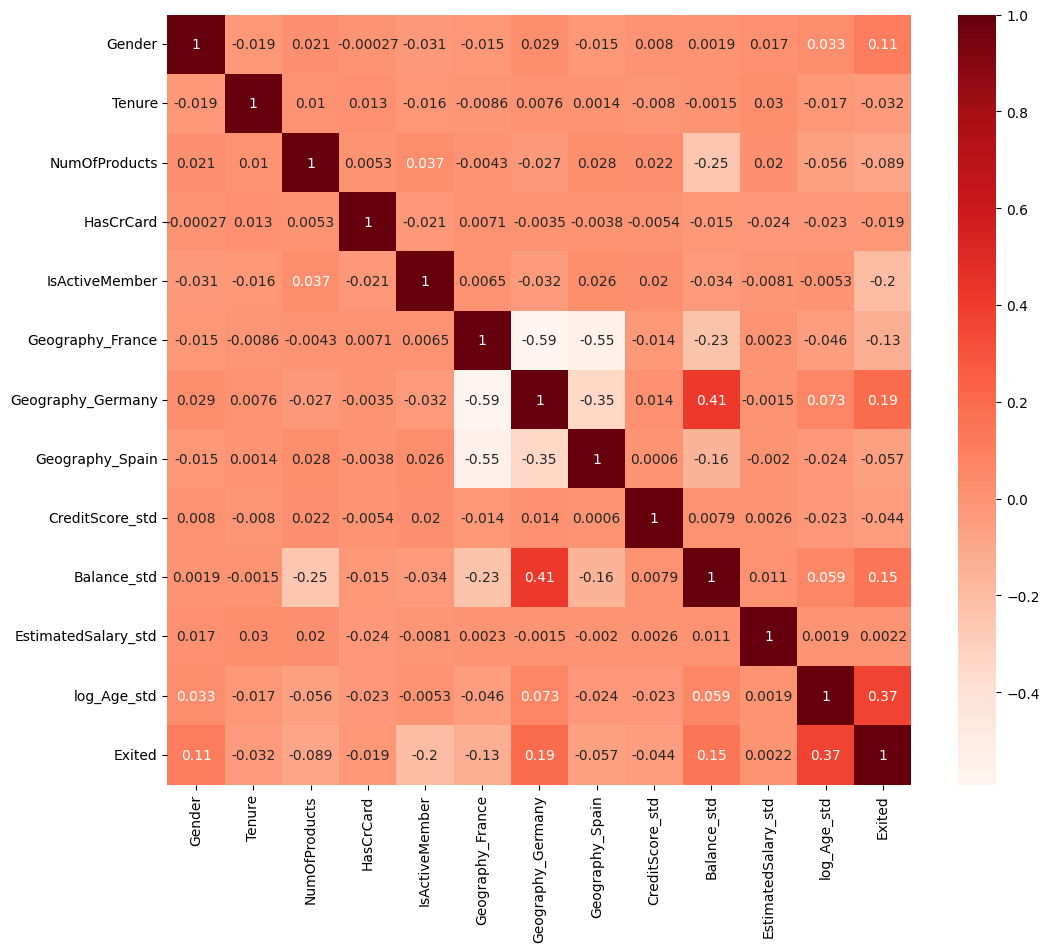

In [57]:
plt.figure(figsize=(12,10))
pc = df_train.corr()
sns.heatmap(pc, annot=True, cmap=plt.cm.Reds)
plt.show()

In [58]:
#Correlation with output variable
pc_target = abs(pc["Exited"])

#Selecting highly correlated features
relevant_features = pc_target[pc_target > 0.12]
relevant_features

IsActiveMember       0.203261
Geography_France     0.125555
Geography_Germany    0.193825
Balance_std          0.145793
log_Age_std          0.371910
Exited               1.000000
Name: Exited, dtype: float64

**Feature Selected using Pearson Correlation: [Gender, Geography_Germany, Balance_std, log_Age_std]**

#**Machine Learning Process**

## **Train and Test data assignment** & **Metrics Import**

**Assignment** of exported .csv file to **X_train, y_train, X_test** and **y_test** data

**Metrics Import**

Sebelum melakukan model Machine Learning, kita mengimport metrics terlebih dahulu. Metrics yang dimunculkan adalah Accuracy, Precision, Recall, F1 dan AUC.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    #print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    #print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    #print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    #print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    #print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [60]:
ml_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_train_final.csv')
ml_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_test_final.csv')

# Training
X_train = ml_train[['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                      'Geography_France', 'Geography_Germany', 'Geography_Spain',
                      'CreditScore_std', 'Balance_std', 'EstimatedSalary_std', 'log_Age_std']]
y_train = ml_train[['Exited']]

# Testing
X_test = ml_test[['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                    'Geography_France', 'Geography_Germany', 'Geography_Spain',
                    'CreditScore_std', 'Balance_std', 'EstimatedSalary_std', 'log_Age_std']]
y_test = ml_test[['Exited']]

In [61]:
# Confusion Matrix Settings

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='d'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['tidak churn', 'churn']); ax.yaxis.set_ticklabels(['tidak churn', 'churn'])

## **Extra Tree Classifier (Feature Selection)**

In [62]:
df_pca = df_train

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 4)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)


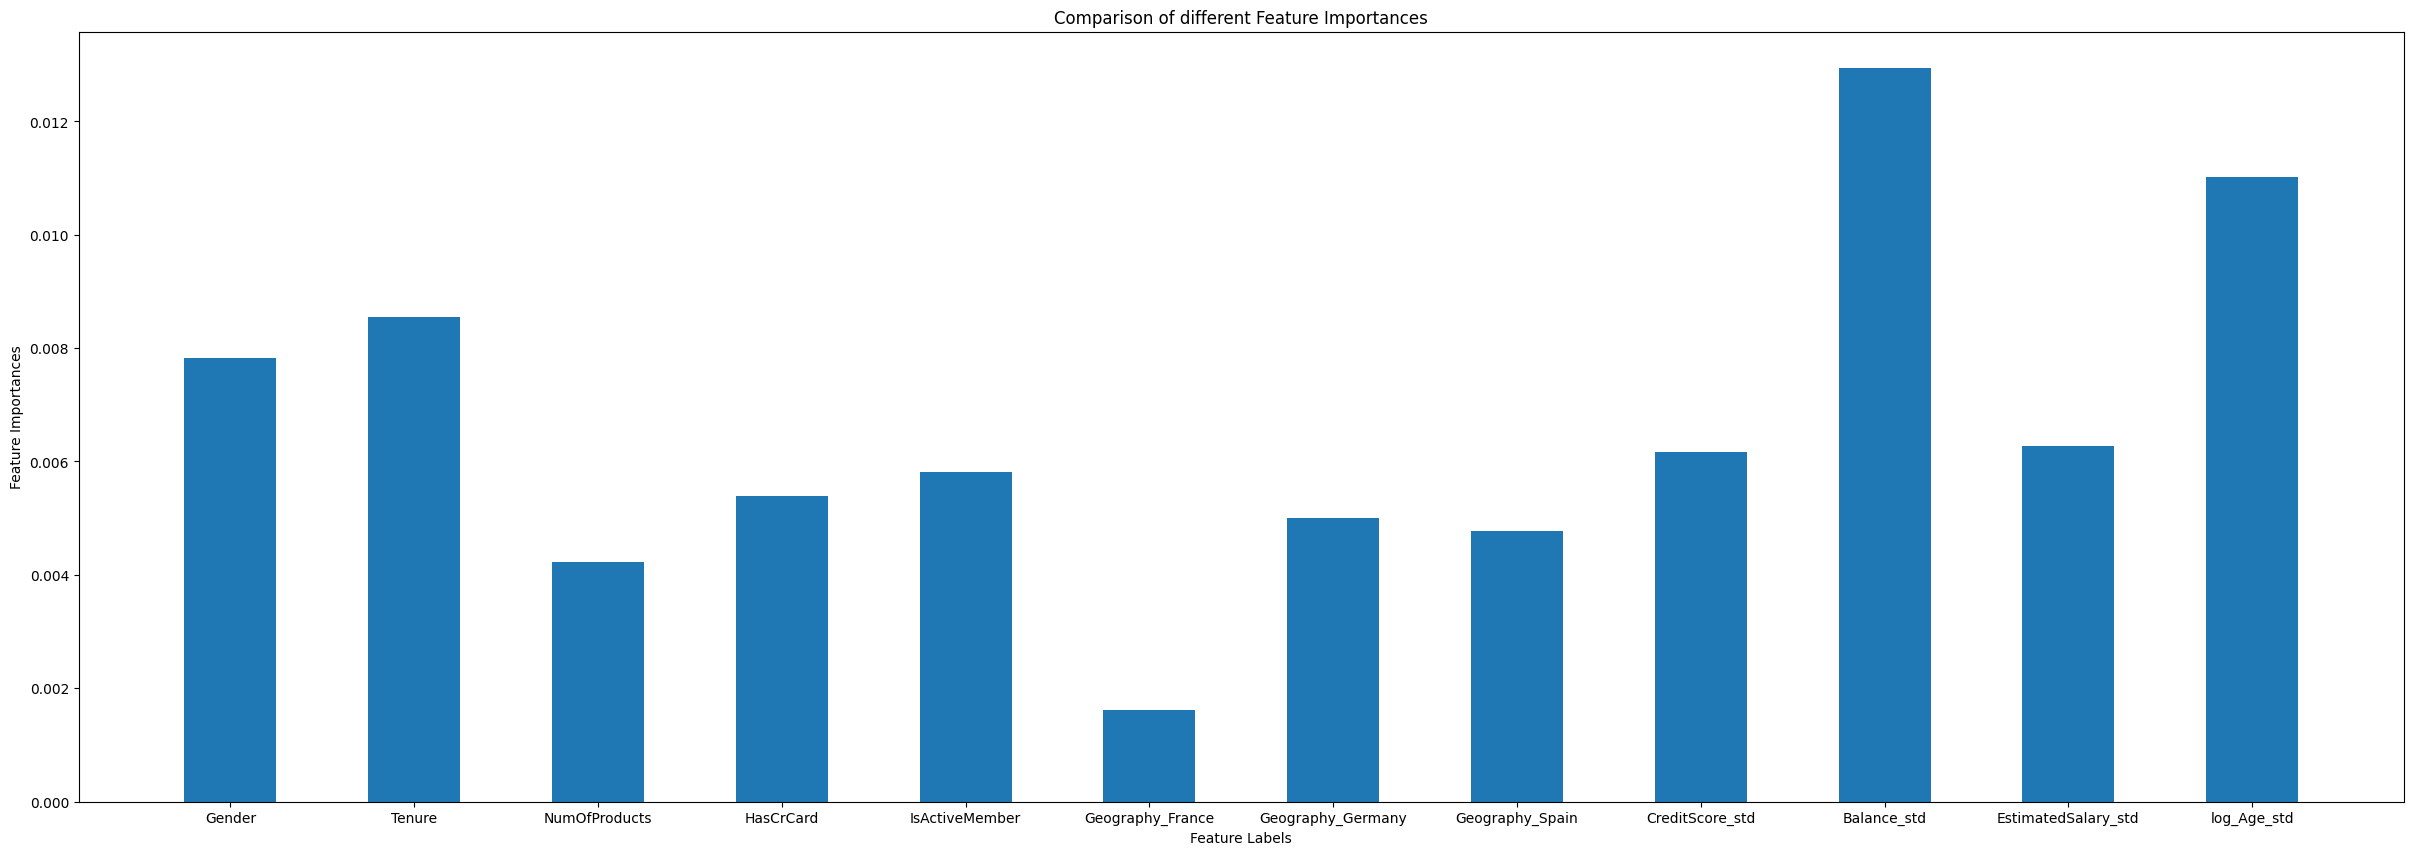

In [64]:
# Plotting a Bar Graph to compare the models

fig = plt.figure(figsize = (30, 10))

# creating the bar plot
plt.bar(X.columns, feature_importance_normalized, width = 0.5)

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

**Feature Selected using Pearson Correlation: [Gender, NumOfProducts, Geography_Germany, log_Age_std]**

## **Machine Learning: K-Nearest Neighbor (KNN)**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())

eval_classification(knn)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.42
Recall (Test Set): 0.44
F1-Score (Test Set): 0.43
AUC (test-proba): 0.72
AUC (train-proba): 0.94


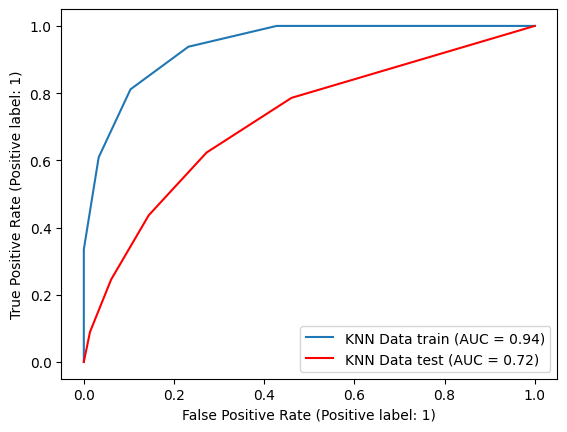

In [66]:
from sklearn.metrics import RocCurveDisplay

knn = knn.fit(X_train, y_train.values.ravel())

ax = plt.gca()
RocCurveDisplay.from_estimator(knn, X_train, y_train, name="KNN Data train", ax=ax, )
RocCurveDisplay.from_estimator(knn, X_test, y_test, color='red', name="KNN Data test", ax=ax)

plt.show()

###**Hyperparameter Tuning Using RandomizedSearch**

In [67]:
knn_parameters = {'n_neighbors': [int(x) for x in np.linspace(1, 100, 100)],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'metric': ['euclidean', 'manhattan', 'minkowski'],
                  'weights': ['uniform', 'distance'],
                  'leaf_size': [int(x) for x in np.linspace(1, 200, 100)]}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, knn_parameters, cv=5, scoring = 'roc_auc', random_state=1)
knn_cv.fit(X_train, y_train.values.ravel())

eval_classification(knn_cv)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.43
Recall (Test Set): 0.43
F1-Score (Test Set): 0.43
AUC (test-proba): 0.73
AUC (train-proba): 1.00


###**Show Best Parameters**

In [68]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'weights': 'distance', 'n_neighbors': 6, 'metric': 'minkowski', 'leaf_size': 165, 'algorithm': 'brute'}
accuracy : 0.880970562787075


###**Cross Validation**

In [69]:
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors = 59, p = 1, leaf_size = 30,  weights = 'uniform')
score = cross_validate(model, X, y.values.ravel(), cv = 5, scoring = 'roc_auc', return_train_score = True)

print('roc_auc(train): ' + str(score['train_score'].mean()))
print('roc_auc(test): ' + str(score['test_score'].mean()))

roc_auc(train): 0.8189245420922084
roc_auc(test): 0.8003706859892837


###**Applying Hyperparameter Tuning into Machine Learning Algorithm**

Hasil akhir ditunjukkan dalam cell berikut.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(n_neighbors = 59, p = 1,
                                 leaf_size = 30,  weights = 'uniform')
knn_tuned.fit(X_train,y_train.values.ravel())

eval_classification(knn_tuned)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.54
Recall (Test Set): 0.36
F1-Score (Test Set): 0.43
AUC (test-proba): 0.79
AUC (train-proba): 0.83


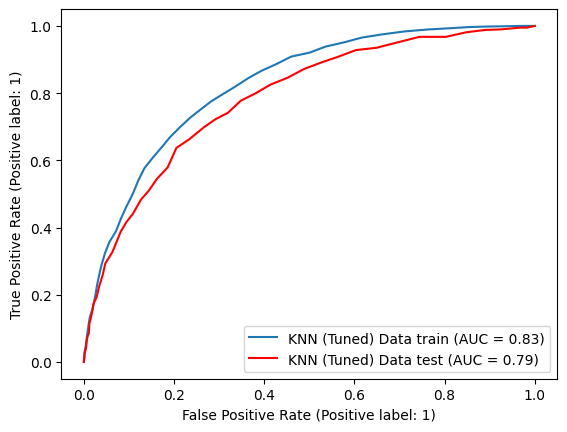

In [71]:
from sklearn.metrics import RocCurveDisplay

knn_tuned = knn_tuned.fit(X_train, y_train.values.ravel())

ax = plt.gca()
RocCurveDisplay.from_estimator(knn_tuned, X_train, y_train, name="KNN (Tuned) Data train", ax=ax)
RocCurveDisplay.from_estimator(knn_tuned, X_test, y_test, color='red', name="KNN (Tuned) Data test", ax=ax)

plt.show()

### **Confusion Matrix**

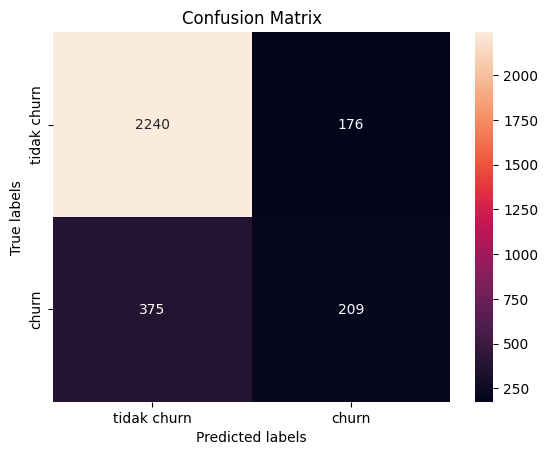

In [72]:
yhat = knn_tuned.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## **Machine Learning: Decision Tree**

Machine learning model pertama adalah Decision Tree Classifier, dengan hasil evaluasi Metrics sebagai berikut.

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)

eval_classification(dtc)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.40
Recall (Test Set): 0.48
F1-Score (Test Set): 0.44
AUC (test-proba): 0.65
AUC (train-proba): 1.00


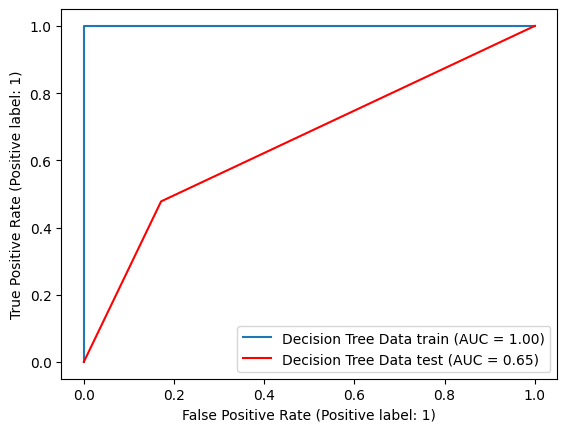

In [74]:
from sklearn.metrics import RocCurveDisplay

dtc = dtc.fit(X_train, y_train.values.ravel())

ax = plt.gca()
RocCurveDisplay.from_estimator(dtc, X_train, y_train, name="Decision Tree Data train", ax=ax)
RocCurveDisplay.from_estimator(dtc, X_test, y_test, color='red', name="Decision Tree Data test",ax=ax)

plt.show()

###**Hyperparameter Tuning Using RandomizedSearch**

Karena model masih overfit, maka harus dilakukan Hyperparameter Tuning. Decision Tree menggunakan RandomizedSearch untuk mengatur model machine learning. Model diatur dengan beberapa hyperparameter, lalu komputer melakukan iterasi sehingga akan ditemukan hasil terbaik dari hyperparameter.  Proses tuning ditunjukkan dalam cell berikut.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 100, 100)]
min_samples_split = [int(x) for x in np.linspace(2, 200, 100)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 100)]
max_features = ['sqrt']
random_state = [int(x) for x in np.linspace(1, 100, 100)]
hyperparameters = dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf, max_features=max_features)

dtc = DecisionTreeClassifier()
rs_dtc = RandomizedSearchCV(dtc, hyperparameters, scoring = 'roc_auc', cv = 5)
rs_dtc.fit(X_train, y_train)

eval_classification(rs_dtc)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.57
Recall (Test Set): 0.44
F1-Score (Test Set): 0.50
AUC (test-proba): 0.78
AUC (train-proba): 0.91


###**Show Best Hyperparameter**

Setelah ditemukan hasil terbaik, langkah selanjutnnya adalah memunculkan Hyperparameter yang terbaik dari pengaturan tuning. Hyperparameter terbaik ditunjukkan sebagai berikut.

In [76]:
show_best_hyperparameter(rs_dtc)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 92, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 17, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Decision Tree Best Parameter: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 86, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 42, 'min_samples_split': 92, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}




###**Cross Validation**

Setelah dilakukan pemunculan hyperparameter terbaik, hyperparameter dimasukkan ke dalam pengetesan Cross Validation untuk memastikan hasil tuning. Proses Cross Validation dilakukan dalam cell berikut.

In [77]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier(criterion = 'gini', max_depth = 86, min_samples_split = 92, min_samples_leaf = 42, max_features = 'sqrt', random_state = 1)
score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)

print('roc_auc(train): ' + str(score['train_score'].mean()))
print('roc_auc(test): ' + str(score['test_score'].mean()))

roc_auc(train): 0.8605117531085064
roc_auc(test): 0.8300371716541971


###**Applying Hyperparameter Tuning into Machine Learning Algorithm**

Setelah melakukan Cross Validation, hasil tersebut diaplikasikan ke algoritma. Hasil akhir ditunjukkan dalam cell berikut.

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 86,
                                   min_samples_split = 92, min_samples_leaf = 42,
                                   max_features = 'sqrt', random_state = 1)
dtc_tuned.fit(X_train,y_train)

eval_classification(dtc_tuned)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.65
Recall (Test Set): 0.44
F1-Score (Test Set): 0.52
AUC (test-proba): 0.80
AUC (train-proba): 0.88


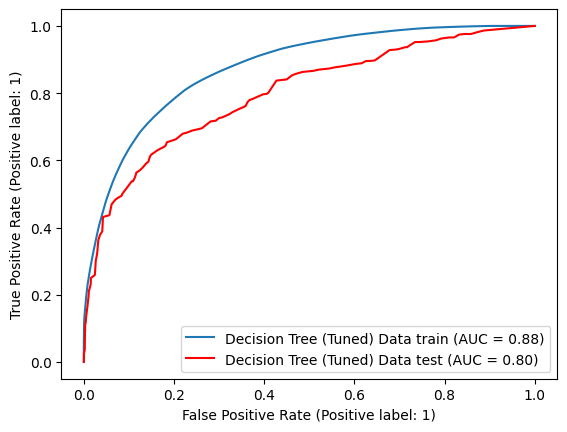

In [79]:
from sklearn.metrics import RocCurveDisplay

dtc_tuned = dtc_tuned.fit(X_train, y_train.values.ravel())

ax =plt.gca()
RocCurveDisplay.from_estimator(dtc_tuned, X_train, y_train, name="Decision Tree (Tuned) Data train", ax=ax)
RocCurveDisplay.from_estimator(dtc_tuned, X_test, y_test, color='red', name="Decision Tree (Tuned) Data test", ax=ax)

plt.show()

### **Confusion Matrix**

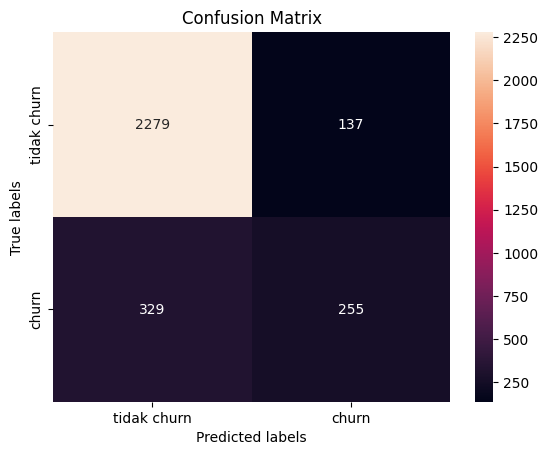

In [80]:
yhat = dtc_tuned.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## **Machine Learning:** XGBoost

Selanjutnya dilakukan percobaan terhadap XGBoost.

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

eval_classification(xgb)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.50
Recall (Test Set): 0.55
F1-Score (Test Set): 0.52
AUC (test-proba): 0.81
AUC (train-proba): 0.99


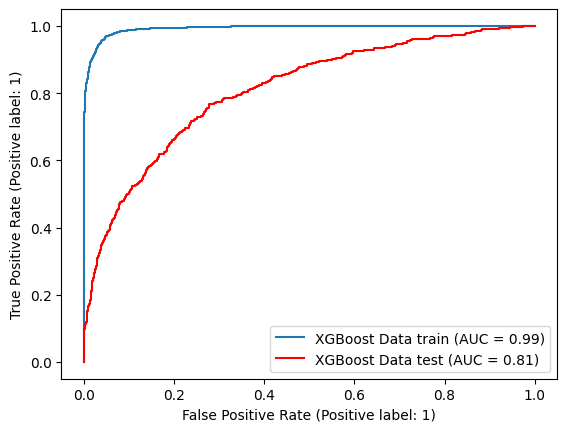

In [82]:
from sklearn.metrics import RocCurveDisplay

xgb = xgb.fit(X_train, y_train.values.ravel())

ax =plt.gca()
RocCurveDisplay.from_estimator(xgb, X_train, y_train, name="XGBoost Data train", ax=ax)
RocCurveDisplay.from_estimator(xgb, X_test, y_test, color='red', name="XGBoost Data test", ax=ax)

plt.show()

###**Hyperparameter Tuning Using RandomSearch**

Karena model masih overfit, maka harus dilakukan Hyperparameter Tuning. XGBoost menggunakan RandomSearch dan GridSearch untuk mengatur model machine learning. Model diatur dengan beberapa hyperparameter, lalu komputer melakukan iterasi sehingga akan ditemukan hasil terbaik dari hyperparameter.  Proses tuning ditunjukkan dalam cell berikut.

In [83]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = {'max_depth' : [int(x) for x in np.linspace(1, 15, 15)],
                   'min_child_weight' : [int(x) for x in np.linspace(1, 100, 100)],
                   'min_split_loss' : [float(x) for x in np.linspace(0, 1, 100)],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                   'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 100)],
                   'learning_rate' : [float(x) for x in np.linspace(0, 0.1, 100)],
                    }

xg = XGBClassifier()
rs_xg = RandomizedSearchCV(xg, hyperparameters, scoring = 'roc_auc', cv = 5)
rs_xg.fit(X_train, y_train)

eval_classification(rs_xg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.68
Recall (Test Set): 0.51
F1-Score (Test Set): 0.58
AUC (test-proba): 0.85
AUC (train-proba): 0.94


###**Show Best Hyperparameter**

Setelah ditemukan hasil terbaik, langkah selanjutnnya adalah memunculkan Hyperparameter yang terbaik dari pengaturan tuning. Hyperparameter terbaik ditunjukkan sebagai berikut.

In [84]:
show_best_hyperparameter(rs_xg)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9090909090909092, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.0595959595959596, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': 19, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'approx', 'validate_parameters': None, 'verbosity': None, 'min_split_loss': 0.05050505050505051}


XGBoost Best Parameter : {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, **'colsample_bytree': 0.494949494949495**, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, **'learning_rate': 0.03333333333333333**, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, **'max_depth': 9**, 'max_leaves': None, **'min_child_weight': 47**, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, **'tree_method': 'approx'**, 'validate_parameters': None, 'verbosity': None, **'min_split_loss': 0.5757575757575758**}

###**Cross Validation**

Setelah dilakukan pemunculan hyperparameter terbaik, hyperparameter dimasukkan ke dalam pengetesan Cross Validation untuk memastikan hasil tuning. Proses Cross Validation dilakukan dalam cell berikut.

In [85]:
from sklearn.model_selection import cross_validate

model = XGBClassifier(max_depth = 9, min_child_weight = 47,
                      min_split_loss = 0.5757575757575758,
                      tree_method = 'approx',
                      colsample_bytree = 0.494949494949495,
                      learning_rate = 0.03333333333333333)
score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)

print('roc_auc(train): ' + str(score['train_score'].mean()))
print('roc_auc(test): ' + str(score['test_score'].mean()))

roc_auc(train): 0.8970906244659608
roc_auc(test): 0.8787051263428175


###**Applying Hyperparameter Tuning into Machine Learning Algorithm**

Setelah melakukan Cross Validation, hasil tersebut diaplikasikan ke algoritma. Hasil akhir ditunjukkan dalam cell berikut.

In [86]:
from xgboost import XGBClassifier, XGBRegressor

xgb_tuned = XGBClassifier(max_depth = 9, min_child_weight = 47,
                         min_split_loss = 0.5757575757575758,
                         tree_method = 'approx',
                         colsample_bytree = 0.494949494949495,
                         learning_rate = 0.03333333333333333,
                         random_state=42)
xgb_tuned.fit(X_train, y_train)

eval_classification(xgb_tuned)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.75
Recall (Test Set): 0.41
F1-Score (Test Set): 0.53
AUC (test-proba): 0.86
AUC (train-proba): 0.90


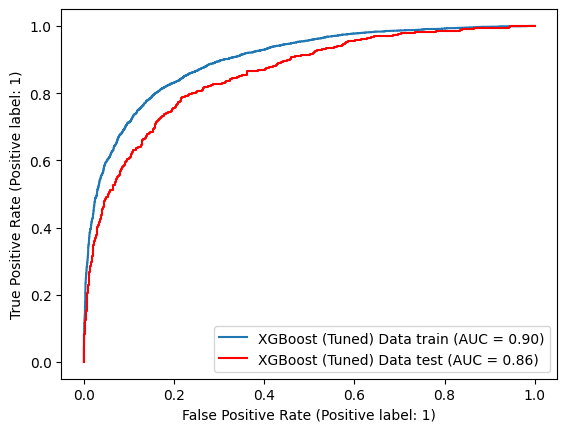

In [87]:
from sklearn.metrics import RocCurveDisplay

xgb_tuned = xgb_tuned.fit(X_train, y_train.values.ravel())

ax =plt.gca()
RocCurveDisplay.from_estimator(xgb_tuned, X_train, y_train,  name="XGBoost (Tuned) Data train", ax=ax)
RocCurveDisplay.from_estimator(xgb_tuned, X_test, y_test, color='red',  name="XGBoost (Tuned) Data test", ax=ax)

plt.show()

### **Confusion Matrix**

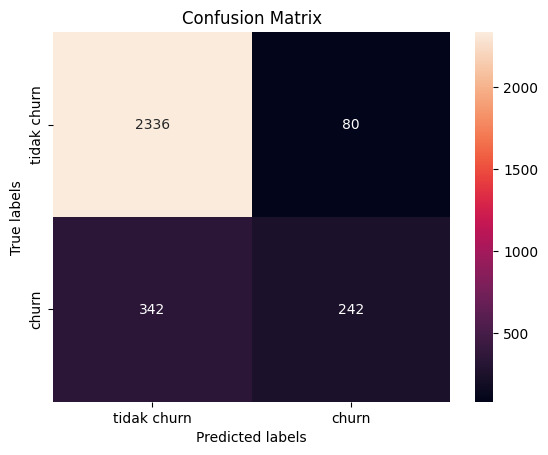

In [88]:
yhat = xgb_tuned.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [89]:
xgb_prediction = pd.DataFrame(yhat, columns=['Exited'])

xgb_prediction

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [90]:
data_full_prediction = X_test.join(xgb_prediction)

data_full_prediction

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
0,0,3,2,0,0,0,1,0,0.492,0.447500,0.208904,0.352678,0
1,0,1,2,1,1,1,0,0,0.546,0.000000,0.731908,0.533787,0
2,1,4,2,1,0,0,0,1,0.502,0.000000,0.292777,0.547878,0
3,0,8,2,1,1,0,1,0,0.312,0.551350,0.853422,0.727690,0
4,1,7,1,1,1,0,0,1,0.420,0.578391,0.573346,0.248536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,2,1,1,1,0,0,1,0.762,0.586813,0.374232,0.473938,0
2996,1,7,2,1,1,1,0,0,0.370,0.517584,0.181354,0.333217,0
2997,0,7,1,1,1,1,0,0,0.518,0.332572,0.759639,0.352678,0
2998,0,2,2,0,1,1,0,0,0.460,0.000000,0.320044,0.333217,0


In [91]:
data_full_prediction.to_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Data/data_full_prediction.csv')

# **Insight**

## **NumOfProducts**

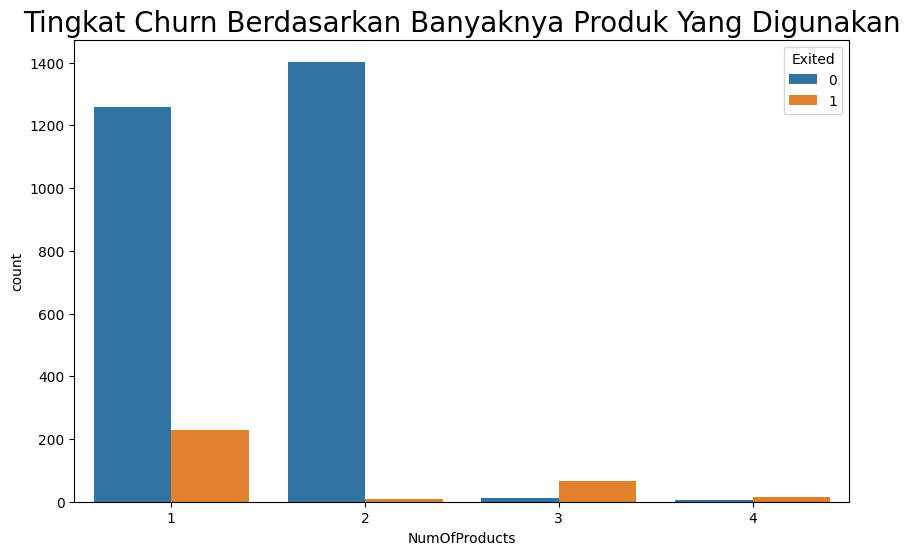

In [92]:
#barplot
plt.figure(figsize=(10,6))
sns.countplot(x='NumOfProducts', data = data_full_prediction, hue = 'Exited')
#Text
plt.title('Tingkat Churn Berdasarkan Banyaknya Produk Yang Digunakan', fontsize = 20)
plt.show()



## **IsActiveMember**

Text(0.5, 1.0, 'Tingkat Churn Berdasarkan Keaktifan Nasabah')

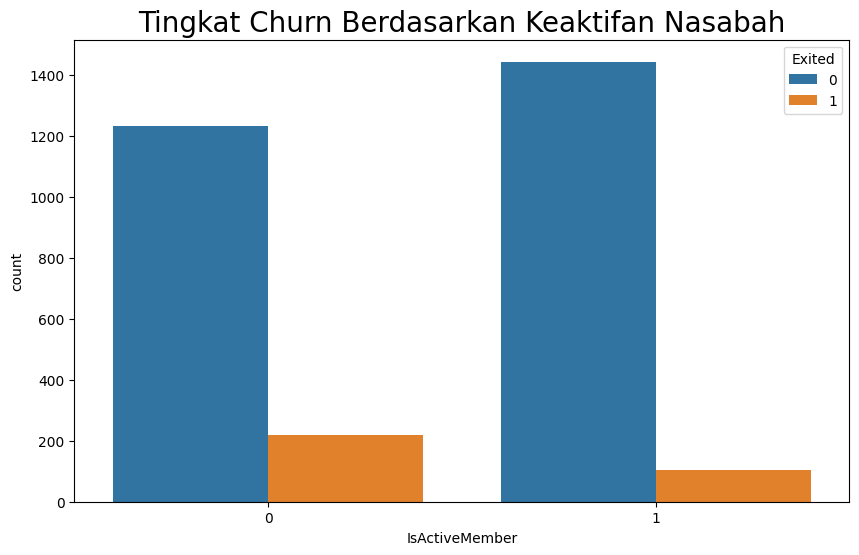

In [93]:
# IsActiveMember Data Visualization

# Size
plt.figure(figsize=(10,6))

# Set style Seaborn and plotting
#sns.set_style('white')
sns.countplot(x='IsActiveMember', data=data_full_prediction, hue='Exited')

#Text
plt.title('Tingkat Churn Berdasarkan Keaktifan Nasabah', fontsize = 20)

## **Age**

Text(0.5, 1.0, 'Tingkat Churn Berdasarkan Umur')

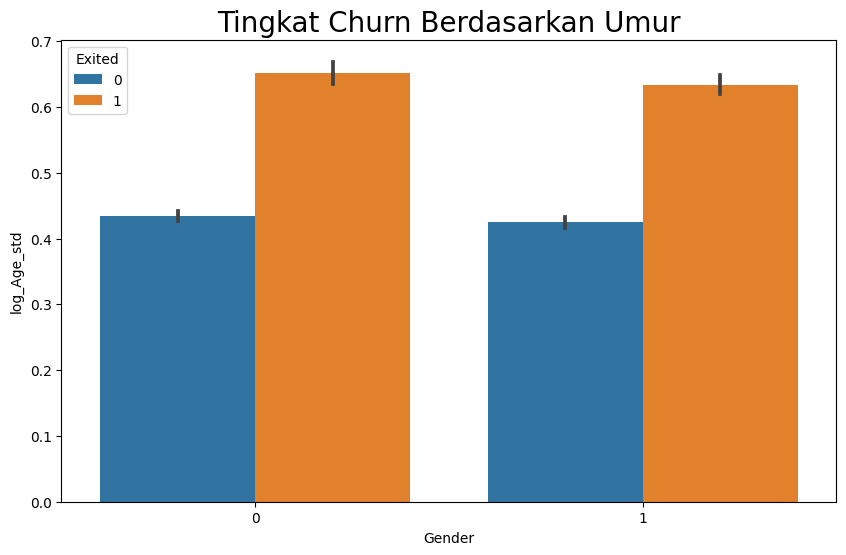

In [94]:
# Age Data Visualization

# Size
plt.figure(figsize=(10,6))


# Set style Seaborn and plotting
#sns.set_style('white')
sns.barplot(y='log_Age_std', x='Gender', hue='Exited', data = data_full_prediction)

#Text
plt.title('Tingkat Churn Berdasarkan Umur', fontsize = 20)

0 = Male

1 = Female

Nasabah laki-laki maupun perempuan di atas 40 tahun cenderung churn

## **Geography**

In [106]:
data_full_prediction.head(10)

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,CreditScore_std,Balance_std,EstimatedSalary_std,log_Age_std,Exited
0,0,3,2,0,0,0,1,0,0.492,0.447500,0.208904,0.352678,0
1,0,1,2,1,1,1,0,0,0.546,0.000000,0.731908,0.533787,0
2,1,4,2,1,0,0,0,1,0.502,0.000000,0.292777,0.547878,0
3,0,8,2,1,1,0,1,0,0.312,0.551350,0.853422,0.727690,0
4,1,7,1,1,1,0,0,1,0.420,0.578391,0.573346,0.248536,0
5,0,8,2,1,1,0,0,1,0.880,0.000000,0.747105,0.441669,0
6,1,3,1,1,0,0,0,1,0.178,0.642736,0.378408,0.352678,0
7,1,6,1,1,0,0,1,0,0.494,0.469801,0.352621,0.123004,0
8,1,4,1,1,0,0,0,1,0.656,0.526557,0.083044,0.489457,0
9,1,3,1,1,1,0,1,0,0.228,0.396462,0.820544,0.519363,0


In [97]:
data_full_prediction.groupby(['Geography_Germany','Exited']).agg({'Exited':['count'] })

Exited
                          count
Geography_Germany Exited       
0                 0        2081
                  1         152
1                 0         597
                  1         170

In [98]:
data_full_prediction.groupby(['Geography_France','Exited']).agg({'Exited':['count'] })

Exited
                         count
Geography_France Exited       
0                0        1264
                 1         228
1                0        1414
                 1          94

In [99]:
data_full_prediction.groupby(['Geography_Spain','Exited']).agg({'Exited':['count'] })

Exited
                        count
Geography_Spain Exited       
0               0        2011
                1         264
1               0         667
                1          58

In [119]:
df_geography = pd.DataFrame ({'Nation':['DEU', 'FRA', 'ESP'],
                              'Exited':[172, 91, 58]
                            })

df_geography

,Nation,Exited
0,DEU,172
1,FRA,91
2,ESP,58


In [120]:
import folium
import requests

geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
response = requests.get(geojson_url)
geojson = response.json()

geojson['features'][0]

{'type': 'Feature',
 'properties': {'name': 'Afghanistan'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[61.210817, 35.650072],
    [62.230651, 35.270664],
    [62.984662, 35.404041],
    [63.193538, 35.857166],
    [63.982896, 36.007957],
    [64.546479, 36.312073],
    [64.746105, 37.111818],
    [65.588948, 37.305217],
    [65.745631, 37.661164],
    [66.217385, 37.39379],
    [66.518607, 37.362784],
    [67.075782, 37.356144],
    [67.83, 37.144994],
    [68.135562, 37.023115],
    [68.859446, 37.344336],
    [69.196273, 37.151144],
    [69.518785, 37.608997],
    [70.116578, 37.588223],
    [70.270574, 37.735165],
    [70.376304, 38.138396],
    [70.806821, 38.486282],
    [71.348131, 38.258905],
    [71.239404, 37.953265],
    [71.541918, 37.905774],
    [71.448693, 37.065645],
    [71.844638, 36.738171],
    [72.193041, 36.948288],
    [72.63689, 37.047558],
    [73.260056, 37.495257],
    [73.948696, 37.421566],
    [74.980002, 37.41999],
    [75.158028, 37.133031],
   

In [127]:
M = folium.Map(location=[50, 30], zoom_start=5)

folium.Choropleth(
    geo_data=geojson,
    data=df_geography,
    columns=['Nation','Exited'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Exited Value",
).add_to(M)

M

In [128]:
M.savefig("/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Colab Tugas Akhir/ChurnGeography.png")

AttributeError: 'Map' object has no attribute 'savefig'

<Axes: xlabel='Geography_Germany', ylabel='count'>

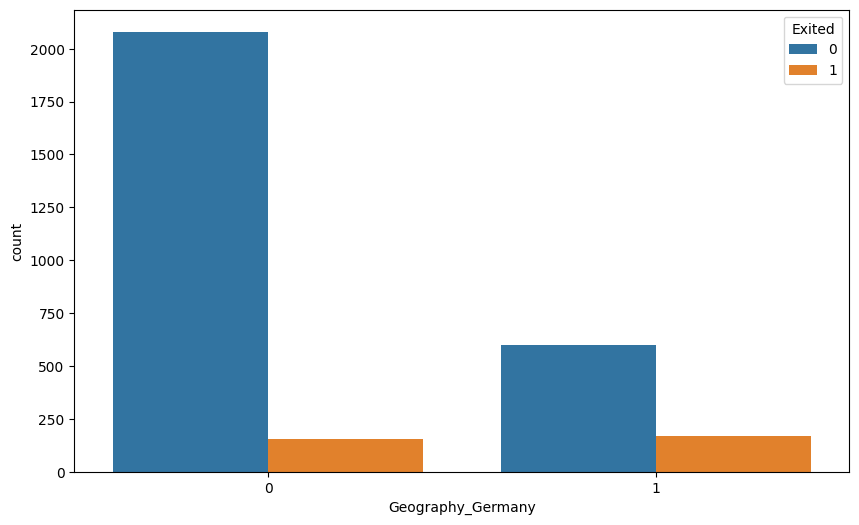

In [107]:
# Age Data Visualization

# Size
plt.figure(figsize=(10,6))

# Set style Seaborn and plotting
#sns.set_style('white')
sns.countplot(x='Geography_Germany', hue='Exited', data = data_full_prediction)

#Text
#plt.title('Tingkat Churn Berdasarkan ', fontsize = 20)

Orang germany yang benar exit = 172

<Axes: xlabel='Geography_France', ylabel='count'>

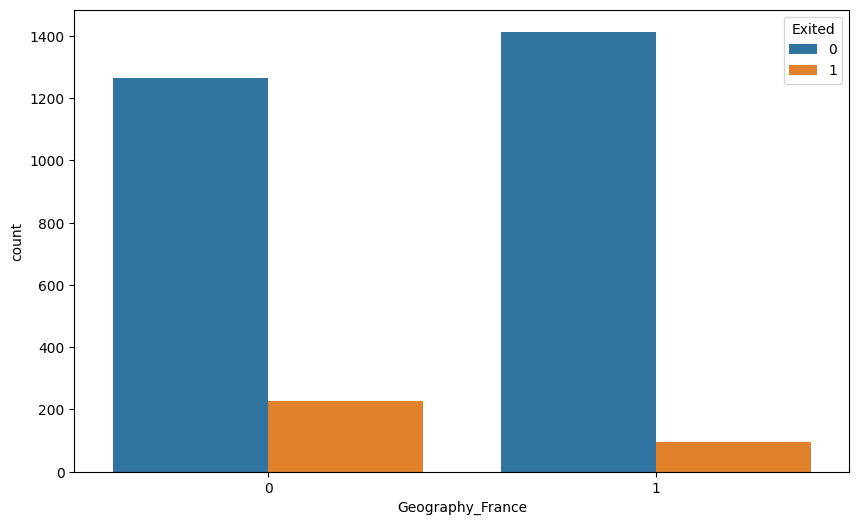

In [108]:
# Age Data Visualization

# Size
plt.figure(figsize=(10,6))

# Set style Seaborn and plotting
#sns.set_style('white')
sns.countplot(x='Geography_France', hue='Exited', data = data_full_prediction)

<Axes: xlabel='Geography_Spain', ylabel='count'>

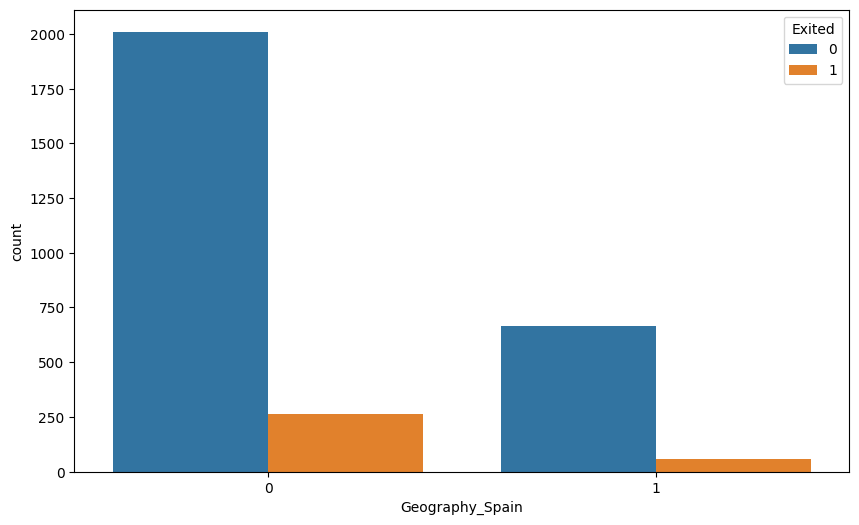

In [109]:
# Age Data Visualization

# Size
plt.figure(figsize=(10,6))

# Set style Seaborn and plotting
#sns.set_style('white')
sns.countplot(x='Geography_Spain', hue='Exited', data = data_full_prediction)

# **Tree XGBoost**

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (40,30), dpi=600)
plot_tree(xgb_tuned, num_trees=5, ax=ax, filled = True)
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/Colab Tugas Akhir/TreeXGB.png')

## **Kesimpulan Akhir**

Dari hasil hyperparameter tuning seluruh algoritma yang dilakukan, Hasil terbaik didapatkan dari algoritma **XGBoost** dengan nilai sebagai berikut:


*   Accuracy (Test Set): 0.86
*   Precision (Test Set): 0.74

*   Recall (Test Set): 0.40
*   F1-Score (Test Set): 0.52

*   AUC (test-proba): 0.85
*   AUC (train-proba): 0.90










**Note: Buat sub bab penerapan model terbaik (XGBoost) setelah Hasil dan Pembahasan Komparasi 3 model, penerapan berdasarkan parameter XGBoost.**

## **Pemunculan Feature Importance**

#### Feature Importance

#### Feature Importance (Algoritma Terbaik)

In [ ]:
show_feature_importance(xgb_tuned)

Berdasarkan feature importance yang telah dimunculkan pada model XGBoost, Empat fitur teratas adalah `NumOfProducts`, `Age`, `IsActiveMember`, dan `Geography`.